
# Project 4: Data Wrangling


# Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#gath">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li> 
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a name="Introduction"></a>
# Introduction:

This project is part of the Udacity Data Analysis Nanodegreee and it is about an analysis of @dog_rates also known as weRateDogs. It is a Twitter account that rates people’s dogs with a humorous comment. They always rate it with a denominator of 10 and numerator always larger than 10 for instance, 11/10, 12/ 10, ...etc. The process of the wrangling involves gathering data from different sources, assessing the quality and tidiness, cleaning what we have assessed, performing analysis of the newly cleaned dataset.


 

In [334]:
from bs4 import BeautifulSoup
import datetime
import os
import json
import pandas as pd
import numpy as np
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy


<a name= "gath"></a>
# Gathering Data

1. **Twitter Archive Enhanced** download this file manually by clicking the following link: [twitter_archived_enhanced](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

2. **The tweet image predictions** i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. **Twitter API & JSON** 

### 1.  twitter_archive_enhanced 

In [335]:
twitter_arch_enh = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
twitter_arch_enh.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_arch_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. Tweet Image Prediction

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
resp = requests.get(url)

with open('image_predictions.tsv', mode = "wb") as file:
    file.write(resp.content)
    
#Read TSV file
image_pred = pd.read_csv("image_predictions.tsv", sep = '\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Twitter API & JSON

In [6]:
# API authentcation
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [7]:
api

In [8]:
# Checking tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for each_id in twitter_arch_enh['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(each_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(each_id)

Rate limit reached. Sleeping for: 667
Rate limit reached. Sleeping for: 672


In [9]:
print("The list of tweets", len(list_of_tweets))
print("The list of not founded tweets", len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of not founded tweets 25


In [10]:
# Then in this code block we isolate the json part of each tweepy status
# object that we have downloaded and we add them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [11]:
# Then writing this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [12]:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [13]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35921,7627,8799121,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30996,5644,8799121,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23317,3740,8799121,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39205,7798,8799121,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37449,8394,8799121,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


<a name= "assess"></a>
# Assesing Data

### Visual Assessment

In [336]:
twitter_arch_enh.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
557,803380650405482500,NaN,NaN,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sonny. He's an in-home movie critic. That...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803380650...,12,10,Sonny,None,None,None,None
986,749064354620928000,NaN,NaN,2016-07-02 02:17:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's pupset because I forgot to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749064354...,11,10,Winston,None,None,None,None
231,847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,13,10,None,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
1084,738402415918125056,NaN,NaN,2016-06-02 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738402415...,10,10,None,None,None,None,None
1971,673270968295534593,NaN,NaN,2015-12-05 22:41:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mac. His dad's probably a lawyer. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673270968...,11,10,Mac,None,None,None,None
1325,706166467411222528,NaN,NaN,2016-03-05 17:16:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He's a shy pup. Doesn't bark m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706166467...,7,10,Dexter,None,None,None,None
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889...,10,10,None,None,None,None,None
1033,745074613265149952,NaN,NaN,2016-06-21 02:03:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Jeffrey. He wasn't prepared to execute...,NaN,NaN,NaN,https://vine.co/v/iQm3JAXuFmv,11,10,Jeffrey,None,None,None,None


In [16]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1507,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
1264,749064354620928000,https://pbs.twimg.com/media/CmU2DVWWgAArvp3.jpg,2,pug,0.985222,True,Brabancon_griffon,0.003314,True,Pekinese,0.002989,True
1885,847842811428974592,https://pbs.twimg.com/media/C8QkidrVYAQXQh7.jpg,1,Bernese_mountain_dog,0.951337,True,Greater_Swiss_Mountain_dog,0.016849,True,Appenzeller,0.010849,True
413,673956914389192708,https://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg,1,pug,0.586161,True,Brabancon_griffon,0.082744,True,Chihuahua,0.045878,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
855,696713835009417216,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg,1,car_mirror,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True
1058,714957620017307648,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great_Pyrenees,0.251516,True,Samoyed,0.139346,True,kuvasz,0.129005,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
203,669749430875258880,https://pbs.twimg.com/media/CUttjYtWcAAdPgI.jpg,1,washbasin,0.245794,False,toilet_seat,0.109420,False,paper_towel,0.105664,False


In [17]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
609,794983741416415232,0,3420,8799124,17,Twitter for iPhone,This is a retweet,This is a retweet
1915,673716320723169284,2960,715,8799157,17,Twitter for iPhone,Original tweet,u
223,847962785489326080,23087,4942,8799123,17,Twitter for iPhone,Original tweet,https://t.co/1G620DbMlY
1121,727175381690781696,3856,1362,8799137,17,Twitter for iPhone,Original tweet,https://t.co/vXLkvyNQHp
675,786963064373534720,26923,8066,8799124,17,Twitter for iPhone,Original tweet,https://t.co/ibj5g6xaAj
170,857393404942143489,5641,1556,8799122,17,Twitter for iPhone,Original tweet,https://t.co/n4Zydf45bT
1194,714957620017307648,4070,1391,8799137,17,Twitter for iPhone,Original tweet,https://t.co/s8YcfZrWhK
625,793195938047070209,15474,5700,8799124,17,Twitter for iPhone,Original tweet,https://t.co/YSi6K1firY
2006,671768281401958400,1146,466,8799157,17,Twitter for iPhone,Original tweet,https://t.co/TASnD8Q08S
563,800443802682937345,0,4383,8799803,17,Twitter for iPhone,This is a retweet,This is a retweet


###  Programmatic Assessment  

In [18]:
# Checking for duplicates
sum(twitter_arch_enh["tweet_id"].duplicated())

0

In [19]:
twitter_arch_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [22]:
twitter_arch_enh["retweeted_status_user_id"].unique()

array([           nan, 4.19698384e+09, 1.96074000e+07, 5.12804507e+08,
       1.54767397e+08, 7.87461778e+17, 3.63890752e+08, 5.87097230e+07,
       6.66990130e+07, 7.47554344e+17, 3.41021133e+08, 5.97064155e+08,
       4.11984180e+07, 8.11740824e+08, 7.26634734e+08, 7.12457247e+17,
       4.46675020e+07, 4.87197737e+08, 2.48855660e+07, 7.99237010e+07,
       1.22832566e+09, 1.73272909e+09, 1.95036846e+08, 2.80479778e+08,
       7.83214000e+05, 4.29683174e+09])

`retweeted_status_user_id` which has values should be dropped because we are only looking for oringial tweets

In [23]:
twitter_arch_enh["rating_denominator"].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

Some `rating_denominator` values are larger than 10

In [24]:
tweet_json["retweeted_status"].unique()

array(['Original tweet', 'This is a retweet'], dtype=object)

There are some retweets in the dataset

Checking dogs names

In [25]:
list(twitter_arch_enh.name.unique())

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

Dogs names have some wrong values and what I found that they all start with a lowercase letter and some dogs have None values.

### Quality issues

<b>1. Twitter Archive Dataset</b>
***
1. Keeping original ratings only (no retweets) that have images


2. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are not necessary for the analysis, so they should be dropped. 


3. The type of the timestamp should be datatime not object


4. The rating_denominator column has some invalid values


5. Some dogs have wrong names like: a, an, they ..., others have None values


6. tweeted_id should be converted to string


7. rating_numerator and rating_denominator should be converted to float.

***

<b>2. Tweet Image Prediction</b>

***

1. tweet_id should be converted to a string

<b>3. Twitter API & JSON</b>

1. Dropping retweets and keeping original tweets only.
 






### Tidiness
***
1. Melting dog stages into one column
2. Merging the 3 datasets
3. Creating a column for the image prediction and a column for the confidence level

<a name= "clean"></a>
# Cleaning Data 


In [274]:
# Copying the dataframe into other, just in case something happened.
twitter_arch_enh_clean = twitter_arch_enh.copy()
image_pred_clean = image_pred.copy()
tweet_json_clean = tweet_json.copy()

<b>Define:</b>
* 1. Keeping original tweets only and dropping retweets from `twitter_arch_enh_clean` dataset.

<b>Code:</b>

In [275]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [276]:
# Dropping retweet values
twitter_arch_enh_clean = twitter_arch_enh_clean[pd.isnull(twitter_arch_enh_clean.retweeted_status_user_id)]

<b>Test:</b>

In [277]:
twitter_arch_enh_clean.retweeted_status_user_id.count()

0

In [278]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

<b>Define:</b>
* 2. Dropping in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp from the `twitter_arch_enh_clean` dataset.

<b>Code:</b>

In [279]:
twitter_arch_enh_clean = twitter_arch_enh_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                     'retweeted_status_timestamp'], axis = 1)

<b>Test:</b>

In [280]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


<b>Unnecessary columms were dropped.

<b>Define:</b>
* 3. Converting the data type of the `timestamp` to datetime for the `twitter_arch_enh_clean` dataset.


<b>Code:</b>

In [281]:
twitter_arch_enh_clean["timestamp"] = pd.to_datetime(twitter_arch_enh_clean["timestamp"])

<b>Test:</b>

In [282]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

<b>Define:</b>
* 4. Dropping `rating_denominator` values which are less than 10 because are invalid

<b>Code:</b>

In [283]:
twitter_arch_enh_clean.drop((twitter_arch_enh_clean[twitter_arch_enh_clean["rating_denominator"] < 10]).index, inplace = True)

<b>Test:</b>

In [284]:
twitter_arch_enh_clean[twitter_arch_enh_clean["rating_denominator"] < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [285]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2172 non-null   int64              
 1   timestamp           2172 non-null   datetime64[ns, UTC]
 2   source              2172 non-null   object             
 3   text                2172 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2172 non-null   int64              
 6   rating_denominator  2172 non-null   int64              
 7   name                2172 non-null   object             
 8   doggo               2172 non-null   object             
 9   floofer             2172 non-null   object             
 10  pupper              2172 non-null   object             
 11  puppo               2172 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

<b>Define:</b>
* 5. Fixing wrong dog `name`s and removing the null values

<b>Code:</b>

In [286]:
# Checking the unique values of dogs
list(twitter_arch_enh_clean["name"].unique())

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Jed',
 'Sebastian',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'Dewey',
 'Scout',
 'Gizmo',
 'Walter',
 'Cooper',
 'Harold',
 'Shikha',
 'Lili',
 'Jamesy',
 'Coco',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 'Belle',
 'Quinn',
 'Zooey',
 'Dave',
 'Jer

While scrolling, I noticed that all wrong names has a feature in common which is, they all startwith a lowercase letter.

In [287]:
len(twitter_arch_enh_clean[twitter_arch_enh_clean.name.str.islower()])

103

In [288]:
len(twitter_arch_enh_clean[twitter_arch_enh_clean.name == "None"])

679

Since, we want to convert 103 values to `None` and we already have 679 values that have `None` values. Therefore, our goal is to have in the end 782 `None` values

In [289]:
# Replacing wrong values with None
wrong_values = list(twitter_arch_enh_clean[twitter_arch_enh_clean.name.str.islower()].name)
twitter_arch_enh_clean.name.replace(to_replace = wrong_values, value = "None", inplace = True)

<b>Test:</b>

In [290]:
twitter_arch_enh_clean[twitter_arch_enh_clean.name.str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [291]:
len(twitter_arch_enh_clean[twitter_arch_enh_clean.name == "None"])

782

<b>Define:</b>
* 6. Coverting tweeted_id to a string 


<b>Code:</b>

In [292]:
twitter_arch_enh_clean['tweet_id'] = twitter_arch_enh_clean['tweet_id'].astype(str)

<b>Test:</b>

In [293]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2172 non-null   object             
 1   timestamp           2172 non-null   datetime64[ns, UTC]
 2   source              2172 non-null   object             
 3   text                2172 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2172 non-null   int64              
 6   rating_denominator  2172 non-null   int64              
 7   name                2172 non-null   object             
 8   doggo               2172 non-null   object             
 9   floofer             2172 non-null   object             
 10  pupper              2172 non-null   object             
 11  puppo               2172 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

<b>Define</b>
* 7. Convrting the rating_numerator and rating_denominator data type to a float

<b>Code:</b>

In [294]:
twitter_arch_enh_clean["rating_numerator"] = twitter_arch_enh_clean["rating_numerator"].astype(float)
twitter_arch_enh_clean["rating_denominator"] = twitter_arch_enh_clean["rating_denominator"].astype(float)

<b>Test:</b>

In [295]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2172 non-null   object             
 1   timestamp           2172 non-null   datetime64[ns, UTC]
 2   source              2172 non-null   object             
 3   text                2172 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2172 non-null   float64            
 6   rating_denominator  2172 non-null   float64            
 7   name                2172 non-null   object             
 8   doggo               2172 non-null   object             
 9   floofer             2172 non-null   object             
 10  pupper              2172 non-null   object             
 11  puppo               2172 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

<b>Define:</b>
* 8. `tweet_id` should be converted to a string in the `image_pred_clean` dataset

<b>Code:</b>

In [296]:
image_pred_clean["tweet_id"] = image_pred_clean["tweet_id"].astype(str)

<b>Test:</b>

In [297]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


<b>Define:</b>
* 9. Creating a column for the image prediction and a column for the confidence level



In [298]:
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_pred_clean):
    if image_pred_clean['p1_dog'] == True:
        dog_type.append(image_pred_clean['p1'])
        confidence_list.append(image_pred_clean['p1_conf'])
    elif image_pred_clean['p2_dog'] == True:
        dog_type.append(image_pred_clean['p2'])
        confidence_list.append(image_pred_clean['p2_conf'])
    elif image_pred_clean['p3_dog'] == True:
        dog_type.append(image_pred_clean['p3'])
        confidence_list.append(image_pred_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_pred_clean.apply(image, axis=1)

#create new columns
image_pred_clean['dog_type'] = dog_type
image_pred_clean['confidence_list'] = confidence_list

In [299]:
image_pred_clean = image_pred_clean[image_pred_clean['dog_type'] != 'Error']

In [300]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   object 
 1   jpg_url          1751 non-null   object 
 2   img_num          1751 non-null   int64  
 3   p1               1751 non-null   object 
 4   p1_conf          1751 non-null   float64
 5   p1_dog           1751 non-null   bool   
 6   p2               1751 non-null   object 
 7   p2_conf          1751 non-null   float64
 8   p2_dog           1751 non-null   bool   
 9   p3               1751 non-null   object 
 10  p3_conf          1751 non-null   float64
 11  p3_dog           1751 non-null   bool   
 12  dog_type         1751 non-null   object 
 13  confidence_list  1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 169.3+ KB


<b>Define:</b>
* 10. Dropping retweets and keeping original tweets only from the `tweet_json` dataset.

<b>Code:</b>

In [301]:
# Checking the number of retweets in the dataset
tweet_json_clean[tweet_json_clean["retweeted_status"] == 'This is a retweet']["retweeted_status"].count()

163

In [302]:
tweet_json_clean.drop((tweet_json_clean[tweet_json_clean["retweeted_status"] == 'This is a retweet']).index, inplace = True)

<b>Test:</b>

In [303]:
tweet_json_clean[tweet_json_clean["retweeted_status"] == 'This is a retweet']["retweeted_status"].count()

0

In [304]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2168 non-null   object
 1   favorite_count    2168 non-null   int64 
 2   retweet_count     2168 non-null   int64 
 3   followers_count   2168 non-null   int64 
 4   friends_count     2168 non-null   int64 
 5   source            2168 non-null   object
 6   retweeted_status  2168 non-null   object
 7   url               2168 non-null   object
dtypes: int64(4), object(4)
memory usage: 152.4+ KB


<b>Define:</b>
* 11. Merging the 3 datasets to one dataset.

<b>Code:</b>

In [305]:
twitter_arch_enh_clean = pd.merge(left = twitter_arch_enh_clean, right = image_pred_clean, left_on='tweet_id',
                                  right_on='tweet_id', how='inner')

In [306]:
twitter_arch_enh_clean = pd.merge(twitter_arch_enh_clean, tweet_json_clean, on='tweet_id', how='inner')

<b>Test:</b>

In [307]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1677 non-null   object             
 1   timestamp           1677 non-null   datetime64[ns, UTC]
 2   source_x            1677 non-null   object             
 3   text                1677 non-null   object             
 4   expanded_urls       1677 non-null   object             
 5   rating_numerator    1677 non-null   float64            
 6   rating_denominator  1677 non-null   float64            
 7   name                1677 non-null   object             
 8   doggo               1677 non-null   object             
 9   floofer             1677 non-null   object             
 10  pupper              1677 non-null   object             
 11  puppo               1677 non-null   object             
 12  jpg_url             1677 non-null 

<b>Define:</b>
* 12. Melt dog stages into one column using apply method

<b>Code:</b>

In [308]:
MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
dog_stage = twitter_arch_enh_clean[MELTS_COLUMNS].replace('None', '')
twitter_arch_enh_clean['dog_stage'] = dog_stage.apply(lambda x: ''.join(x), axis=1).replace('^$', np.nan, regex=True)

twitter_arch_enh_clean.drop(MELTS_COLUMNS, axis=1, inplace=True)

<b>Test:</b>

In [309]:
twitter_arch_enh_clean.dog_stage.value_counts()

pupper          168
doggo            53
puppo            21
doggopupper       8
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [310]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1677 non-null   object             
 1   timestamp           1677 non-null   datetime64[ns, UTC]
 2   source_x            1677 non-null   object             
 3   text                1677 non-null   object             
 4   expanded_urls       1677 non-null   object             
 5   rating_numerator    1677 non-null   float64            
 6   rating_denominator  1677 non-null   float64            
 7   name                1677 non-null   object             
 8   jpg_url             1677 non-null   object             
 9   img_num             1677 non-null   int64              
 10  p1                  1677 non-null   object             
 11  p1_conf             1677 non-null   float64            
 12  p1_dog              1677 non-null 

<a name= "store"></a>
# Storing Data

In [311]:
twitter_arch_enh_clean.to_csv("twitter_archive_master.csv", index = False)

<a name= "eda"></a>
# Exploratory Data Analysis

### Most Popular Dog Breeds

In [312]:
top_dogs = twitter_arch_enh_clean["dog_type"].value_counts().iloc[:10].to_frame().reset_index().rename(columns = {"index":"dog_type", "dog_type":"value_counts"})
top_dogs

,dog_type,value_counts
0,golden_retriever,157
1,Labrador_retriever,106
2,Pembroke,95
3,Chihuahua,91
4,pug,62
5,toy_poodle,50
6,chow,48
7,Pomeranian,42
8,Samoyed,41
9,malamute,33


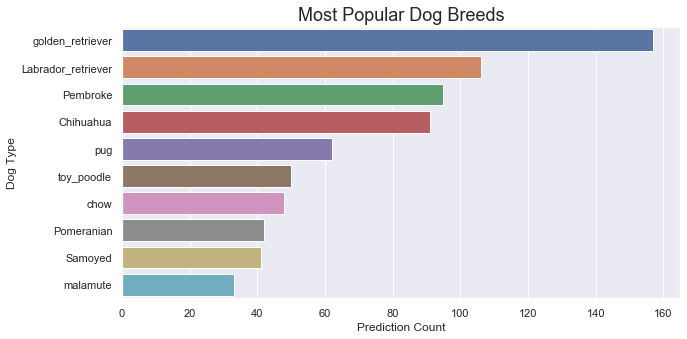

In [313]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x="value_counts", y="dog_type", data=top_dogs)

ax.set_title("Most Popular Dog Breeds",fontsize = 18);
ax.set_ylabel('Dog Type')    
ax.set_xlabel('Prediction Count');

golden_retriever has the highest prediction count 

### Dog Stages count

In [314]:
dog_stage_df = twitter_arch_enh_clean.drop(twitter_arch_enh_clean.query('(dog_stage == "None")').index)
dog_stage_df

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,Chihuahua,0.323581,30996,5644,8799121,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L,NaN
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,Chihuahua,0.716012,23317,3740,8799121,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy,NaN
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,Labrador_retriever,0.168086,39205,7798,8799121,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,NaN
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,basset,0.555712,37449,8394,8799121,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3,NaN
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,Chesapeake_Bay_retriever,0.425595,18873,2817,8799121,17,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,miniature_pinscher,0.560311,96,40,8799158,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq,NaN
1673,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,Rhodesian_ridgeback,0.408143,269,130,8799158,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx,NaN
1674,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,German_shepherd,0.596461,111,41,8799158,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR,NaN
1675,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,redbone,0.506826,120,42,8799158,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI,NaN


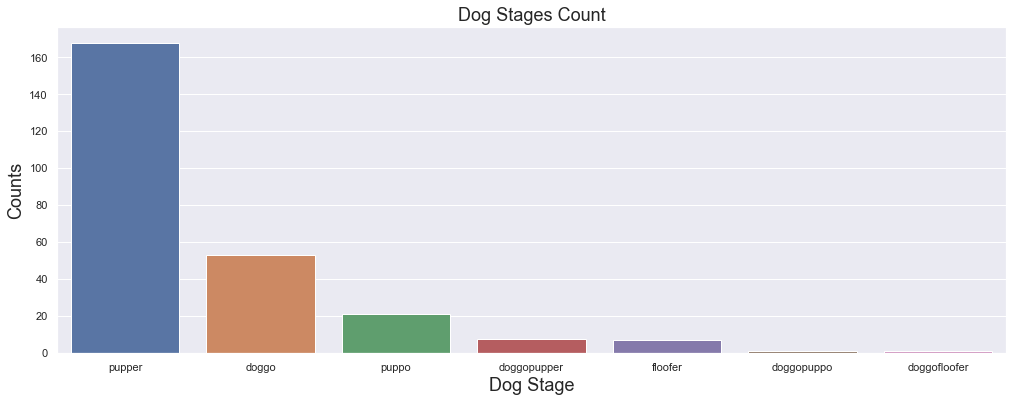

In [333]:
plt.figure(figsize = (17,6))
sns.countplot(dog_stage_df['dog_stage'],order = dog_stage_df['dog_stage'].value_counts().index);
plt.xlabel('Dog Stage', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);
plt.title("Dog Stages Count", fontsize = 18);

Pupper is the most common dog stage in the dda

### Favourite count and retweet count by Year

In [316]:
ret_fav_year = twitter_arch_enh_clean.groupby(twitter_arch_enh_clean["timestamp"].dt.year).count()[["favorite_count", "retweet_count"]].reset_index()

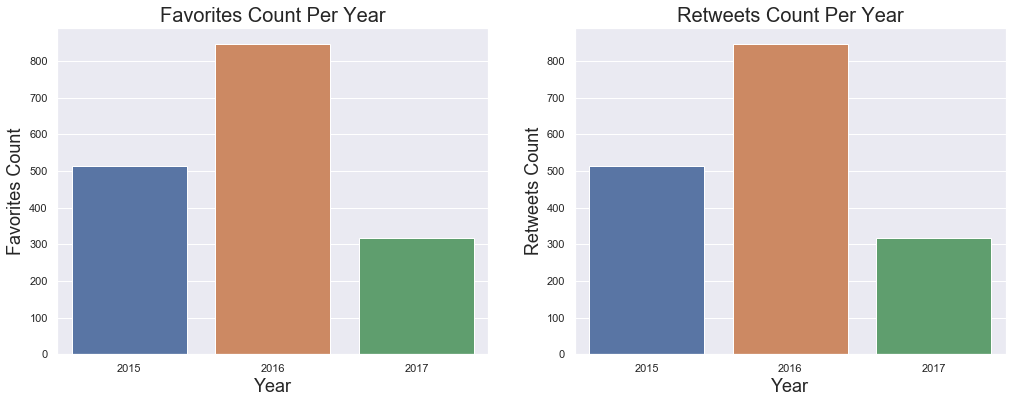

In [332]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,6))
sns.barplot(x = ret_fav_year['timestamp'],y = ret_fav_year['favorite_count'],ax = ax1);
sns.barplot(x = ret_fav_year['timestamp'], y = ret_fav_year['retweet_count'],ax = ax2);
ax1.set_xlabel('Year',fontsize = 18);
ax1.set_title("Favorites count per year".title(), fontsize = 20)
ax1.set_ylabel('Favorites Count',fontsize = 18)
ax2.set_xlabel('Year',fontsize = 18);
ax2.set_title("Retweets count per year".title(), fontsize = 20)
ax2.set_ylabel('Retweets Count',fontsize = 18);

2016 had the most retweet counts and favourite counts